

# Project: TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset was generated from The Movie Database API. This product uses the TMDb API but is not endorsed or certified by TMDb.
Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows..
>
>This project uses this data set to answer few quistions like which genres are
most popular from year to year? and What kinds of properties are associated with movies that have high revenues?

In [1]:
##importing all required libraries##
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from ast import literal_eval
%matplotlib inline

In [2]:
##a function to plot graphs##
##I prefer to use the full code rather the FN becaause it is more dynamic and readable
def draw(d1,d2,d3,d4,d5,d6,d7) :
    yy= d1.plot(x=d2, y=d3, kind=d4)
    # Add title and format it - replace 'Title'
    plt.title(d5.title(),fontsize = 14, weight = "bold")
    # Add x label and format it - replace 'X_label'
    plt.xlabel(d6.title(),fontsize = 10, weight = "bold")
    # Add y label and format it - replace 'Y_label'
    plt.ylabel(d7.title(),fontsize = 10, weight = "bold")
    plt.legend([d3]);
    return yy


<a id='wrangling'></a>
## Data Wrangling
so here we load the data and check for status about it and create a new coloumn for release year.


### General Properties

In [3]:
##loading data##
df = pd.read_csv('tmdb_5000_movies.csv')
#df_c=pd.read_csv('tmdb_5000_credits.csv')
#df_c is unused in this project
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df.shape

(4803, 20)

In [5]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
##creating new coloumn to help us investigate our data set by years##
df['release_date'] =pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0




### Data Cleaning (cleaning the data set so it can be easly used to answer our questions)
here we delete a few coloumns['spoken_languages', 'production_companies', 'keywords','homepage'] because we won't use them in our investigation .
Then we split the genres coloumn into a new data frame ,each genre will get a row ''yay'' .


In [8]:
df.drop(['spoken_languages', 'production_companies', 'keywords','homepage'], axis = 1, inplace = True)
df.head()

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0


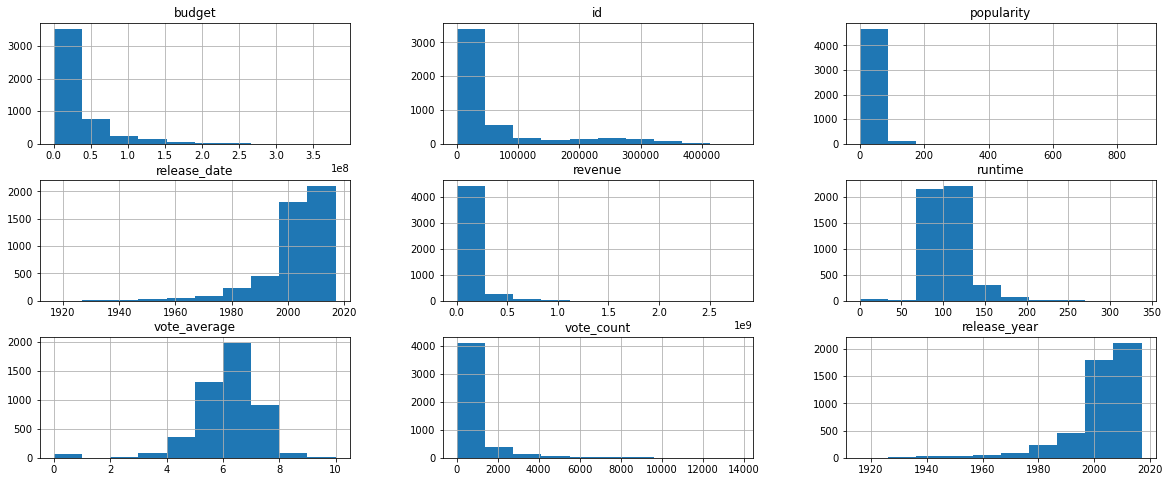

In [9]:
df.hist(figsize=(20,8));

In [10]:
##pandas recovers the data as object but we need the geners coloumn as list so we can extract only genres from it##
df.genres = df.genres.apply(literal_eval)

In [11]:
##creating numpy array to store lists of genres for each movie##
z=[]
for genre in df['genres'] :
    #print(genre)
    x=[]
    for y in genre :
        #print(y)
        if 'name' in y :   
            x.append(y['name'])
    #print(x)
    z.append(x)
       
#print(z)
x_ar=np.array(z)
#print(x_ar)
print(x_ar[0])
df['genres']=x_ar
df.head()

['Action', 'Adventure', 'Fantasy', 'Science Fiction']


C:\Users\DELL\AppData\Local\Temp\ipykernel_14528\1119577076.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_ar=np.array(z)


,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[Action, Adventure, Crime]",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0
3,250000000,"[Action, Crime, Drama, Thriller]",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[Action, Adventure, Science Fiction]",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0


In [12]:
##splitting genres lists into rows##
genres_df = df.explode('genres')

In [13]:
##removing blank genres rows##
genres_df['genres'].astype(str)
genres_df= genres_df[genres_df.genres != '']
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12188 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                12188 non-null  int64         
 1   genres                12160 non-null  object        
 2   id                    12188 non-null  int64         
 3   original_language     12188 non-null  object        
 4   original_title        12188 non-null  object        
 5   overview              12185 non-null  object        
 6   popularity            12188 non-null  float64       
 7   production_countries  12188 non-null  object        
 8   release_date          12187 non-null  datetime64[ns]
 9   revenue               12188 non-null  int64         
 10  runtime               12186 non-null  float64       
 11  status                12188 non-null  object        
 12  tagline               10354 non-null  object        
 13  title            

In [14]:
##checking##
genres_df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12188 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                12188 non-null  int64         
 1   genres                12160 non-null  object        
 2   id                    12188 non-null  int64         
 3   original_language     12188 non-null  object        
 4   original_title        12188 non-null  object        
 5   overview              12185 non-null  object        
 6   popularity            12188 non-null  float64       
 7   production_countries  12188 non-null  object        
 8   release_date          12187 non-null  datetime64[ns]
 9   revenue               12188 non-null  int64         
 10  runtime               12186 non-null  float64       
 11  status                12188 non-null  object        
 12  tagline               10354 non-null  object        
 13  title            

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[Action, Adventure, Crime]",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0
3,250000000,"[Action, Crime, Drama, Thriller]",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[Action, Adventure, Science Fiction]",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0


In [15]:
##creating new dataframes to answer the questions ##
top_rev = df.query('revenue > revenue.mean()')
top_rev.info()
top_pop = df.query('popularity > popularity.mean()')
top_rat = df.query('vote_average > vote_average.mean()')
top_vot = df.query('vote_count > vote_count.mean()')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 4670
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                1308 non-null   int64         
 1   genres                1308 non-null   object        
 2   id                    1308 non-null   int64         
 3   original_language     1308 non-null   object        
 4   original_title        1308 non-null   object        
 5   overview              1308 non-null   object        
 6   popularity            1308 non-null   float64       
 7   production_countries  1308 non-null   object        
 8   release_date          1308 non-null   datetime64[ns]
 9   revenue               1308 non-null   int64         
 10  runtime               1308 non-null   float64       
 11  status                1308 non-null   object        
 12  tagline               1272 non-null   object        
 13  title             

In [16]:
##checing if we are going on the right way ##
genres_df.release_year.to_string()
genres_df.info()
genres_df.groupby(['release_year','genres'])['popularity'].mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12188 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                12188 non-null  int64         
 1   genres                12160 non-null  object        
 2   id                    12188 non-null  int64         
 3   original_language     12188 non-null  object        
 4   original_title        12188 non-null  object        
 5   overview              12185 non-null  object        
 6   popularity            12188 non-null  float64       
 7   production_countries  12188 non-null  object        
 8   release_date          12187 non-null  datetime64[ns]
 9   revenue               12188 non-null  int64         
 10  runtime               12186 non-null  float64       
 11  status                12188 non-null  object        
 12  tagline               10354 non-null  object        
 13  title            

release_year  genres 
1916.0        Drama       3.232447
1925.0        Drama       0.785744
              Romance     0.785744
              War         0.785744
1927.0        Drama      32.351527
                           ...    
2016.0        War        23.410786
              Western    15.333575
2017.0        Comedy      0.710870
              Drama       0.710870
              Family      0.710870
Name: popularity, Length: 988, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis



### Q1: Which genres are most popular from year to year ?

#### it looks creeby ,but i promise just zoom and it will be just fine.
The popularity of genres varies from a year to year..as we can see in 2016 and 2015 the advanture genre was the most popular.
But in 2014 the science fiction genre was the most popular.

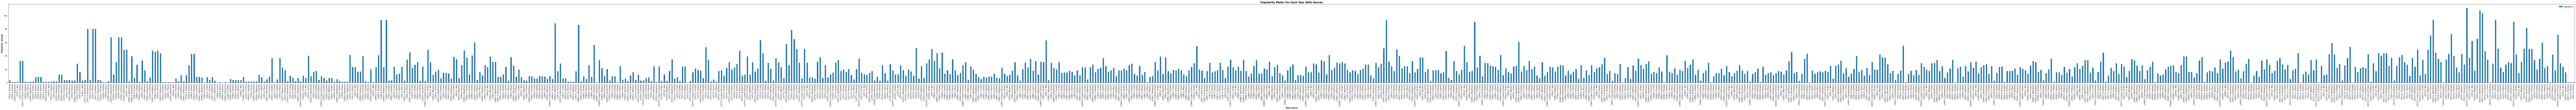

In [17]:
genres_df.groupby(['release_year','genres'])['popularity'].mean().plot(kind='bar',figsize=(256,8));

# Add title and format it - replace 'Title',
plt.title('popularity meter for each year with genres'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it - replace 'X_label'
plt.xlabel('years-genre'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it - replace 'Y_label'
plt.ylabel('popularity  averge'.title(),
               fontsize = 10, weight = "bold")
plt.legend();


#### Here's another vision tp the graph above in case you have a specific genre in mind so you can see if it's popularity increaces or decreases with years


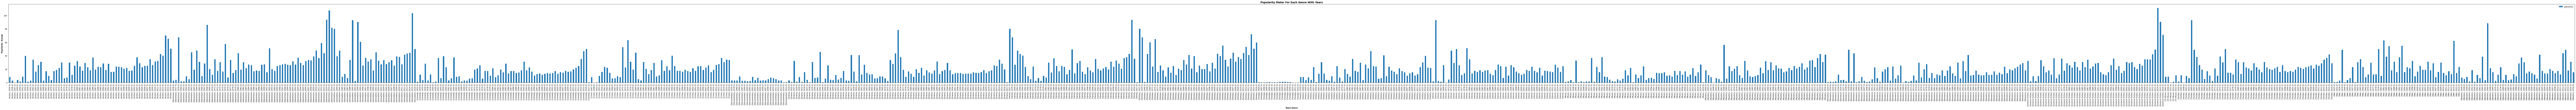

In [18]:
genres_df.groupby(['genres','release_year'])['popularity'].mean().plot(kind='bar',figsize=(256,8));
# Add title and format it - replace 'Title',
plt.title('popularity meter for each genre with years'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it - replace 'X_label'
plt.xlabel('years-genre'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it - replace 'Y_label'
plt.ylabel('popularity  averge'.title(),
               fontsize = 10, weight = "bold")
plt.legend();

### Q2: What kinds of properties are associated with movies that have high revenues?

#### as we can see having a higher budget gives more chances to get higher revenue,don't forget to choose the a more popular genre from the graph above!

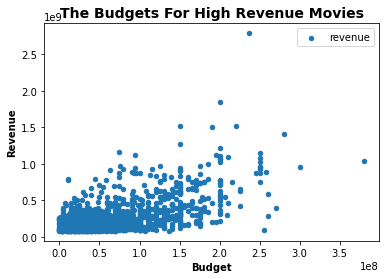

In [19]:
##draw(top_rev,"budget","revenue","scatter",'the budgets for high revenue movies','budget','revenue')
top_rev.plot(x="budget", y="revenue", kind="scatter")
    # Add title and format it - replace 'Title'
plt.title('the budgets for high revenue movies'.title(),fontsize = 14, weight = "bold")
    # Add x label and format it - replace 'X_label'
plt.xlabel('budget'.title(),fontsize = 10, weight = "bold")
    # Add y label and format it - replace 'Y_label'
plt.ylabel('revenue'.title(),fontsize = 10, weight = "bold")
plt.legend(["revenue"]);

#### also producing movies in English will give more chance to get more revenue

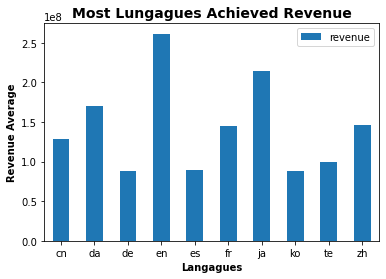

In [20]:
top_rev.groupby(['original_language'])['revenue'].mean().plot(kind='bar',rot=0)
# Add title and format it - replace 'Title'
plt.title('most lungagues achieved revenue'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it - replace 'X_label'
plt.xlabel('langagues'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it - replace 'Y_label'
plt.ylabel('revenue average'.title(),
               fontsize = 10, weight = "bold");
plt.legend();

### Q3: are the hight rates reliable to count on ? 

#### In fact movies with rates above 8.5 are very low on vout counts so no they aren't reliable.

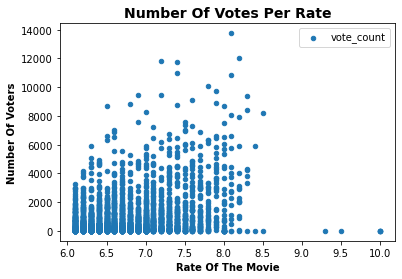

In [21]:
##draw(top_rat,"vote_average","vote_count","scatter",'number of votes per rate','rate of the movie','number of voters')
top_rat.plot(x="vote_average" ,y="vote_count", kind="scatter")
    # Add title and format it - replace 'Title'
plt.title('number of votes per rate'.title(),fontsize = 14, weight = "bold")
    # Add x label and format it - replace 'X_label'
plt.xlabel('rate of the movie'.title(),fontsize = 10, weight = "bold")
    # Add y label and format it - replace 'Y_label'
plt.ylabel('number of voters'.title(),fontsize = 10, weight = "bold")
plt.legend(["vote_count"]);


<a id='conclusions'></a>
## Conclusions

this data set shows a variation in top popular genres each year and it also shows that a high budget movies have a higher chance to get more revenue and also chossing the language of the movie has its ods

##### note :
the data frames are very clean and ready to answer any more inquries you may have ,so if you have another quistion just tell me and the answer will be updated very soon.

### limitations for broader conclusions
-there's a second data set which includes the crew and producing compnies for each movie .it's possible to merge the two data sets to find out the actors and compnies with higher revenue and popularity but i prefered to keep the analysis focused on only genres and movies so it would be more genralized.

-a few coloumns have been dropped  because they are not needed in this scope .
